In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# Query the most recent date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent date in the dataset is {most_recent_date[0]}")

The most recent date in the dataset is 2017-08-23


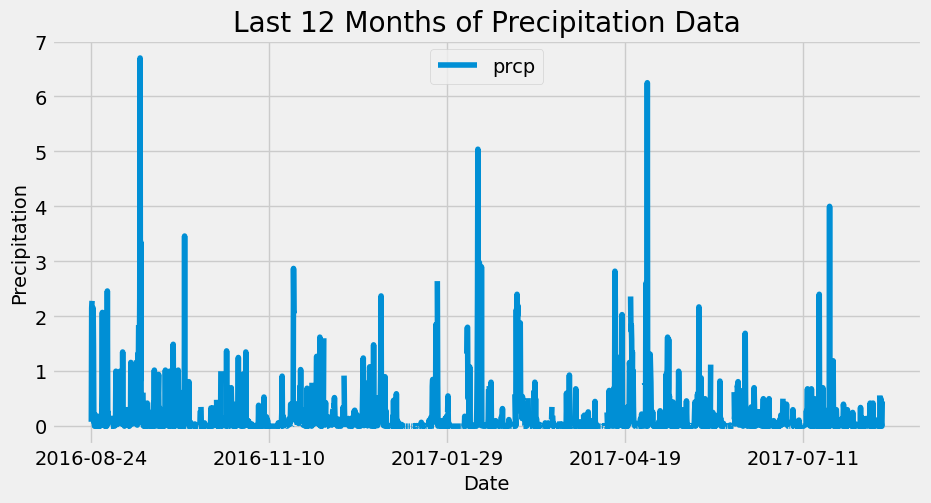

In [11]:
# Find the most recent date in the data set.
# Query the most recent date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Convert the string to a datetime object
recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= one_year_ago).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_prcp, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Last 12 Months of Precipitation Data')
plt.legend(loc='upper center')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df.describe()
print(summary_stats)

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).\
                      order_by(func.count(Measurement.station).desc()).all()


print("Most active stations:")
for station in most_active_stations:
    print(f"{station[0]}: {station[1]}")
    
most_active_station_id = most_active_stations[0][0]
print(f"The station with the greatest number of observations is {most_active_station_id}")

Most active stations:
USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511
The station with the greatest number of observations is USC00519281


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).scalar()

print(f"Lowest temperature for {most_active_station_id}: {lowest_temp}")
print(f"Highest temperature for {most_active_station_id}: {highest_temp}")
print(f"Average temperature for {most_active_station_id}: {avg_temp}")

Lowest temperature for USC00519281: 54.0
Highest temperature for USC00519281: 85.0
Average temperature for USC00519281: 71.66378066378067


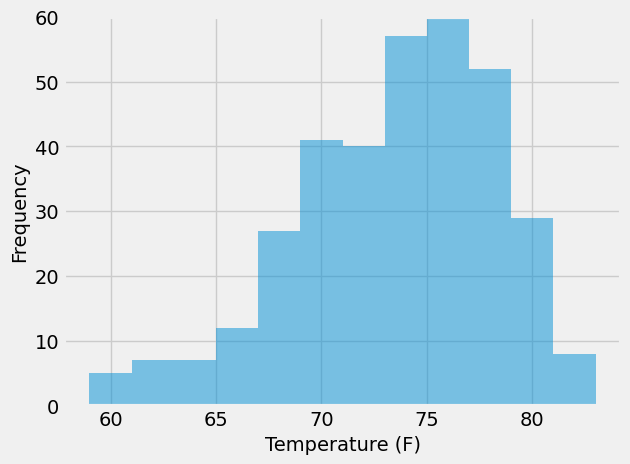

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago = recent_date - dt.timedelta(days=365)
last_year_tobs = session.query(Measurement.tobs).\
                 filter(Measurement.station == most_active_station_id).\
                 filter(Measurement.date >= one_year_ago).\
                 order_by(Measurement.date).all()


# Plot the results as a histogram
# Convert the query results to a list and create a histogram
tobs_list = [result[0] for result in last_year_tobs]
plt.hist(tobs_list, bins=12, alpha=0.5)

# Set the x-axis and y-axis labels
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Set the y-axis limits
plt.ylim(0, 60)

# Show the plot
plt.show()

# Close session

In [18]:
# Close Session
session.close()